# Lead Scoring - Case Study

Submitted by:
- Tanisha Grover
- Tushar Rajput
- Vansh Tandon

## Step 1: Importing Required Libraries and Packages

In [1]:
# Libraries for Scientific Computing
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette("pastel")

# Libraries for Regression Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# Disabling Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Understanding and Preparation

In [2]:
# Reads and describes dataset
def readDescribeDataset(path):
  # Reads dataset with given path
  df=pd.read_csv(path)
  # Row, Cols in df_credit dataset
  print(f'Path: {path}',end='\n\n')
  print(f'Shape of dataset\n{df.shape}',end='\n\n')
  # Fetching all column labels in df_credit as list of string
  print(f'Columns of dataset\n{df.columns}',end='\n\n')
  return df

eleads=readDescribeDataset("Leads.csv")
eleads.head()

Path: Leads.csv

Shape of dataset
(9240, 37)

Columns of dataset
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interv

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Getting Information about the DataFrame: Index, Data Types, Columns, Non-Null Values, and Memory Usage
eleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Description of all numeric columns in dataset
eleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## **Note**
- The dataset consists of 37 columns and 9240 rows.
- It contains several categorical variables that require encoding into dummy variables for analysis.
- Additionally, the dataset has numerous missing values across multiple columns, which need to be handled through imputation or removal to ensure data consistency and accuracy.

## Step 3: Data Quality Assessment, Data Preprocessing and EDA

## **Cleaning the dataframe**

### Checking for sum and percentage of null/missing values in the dataset

In [5]:
# Finding column wise sum and perctage of missing values
def evalMissingValuesSum(df):
  missing_data = df.isna().sum().sort_values(ascending=False).reset_index()
  missing_data.columns = ['Column Name', 'Missing Values']
  missing_data['Missing Percentage'] = round(100 * (missing_data['Missing Values'] / len(df.index)), 2)
  return missing_data

evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,Lead Quality,4767,51.59
1,Asymmetrique Activity Index,4218,45.65
2,Asymmetrique Profile Score,4218,45.65
3,Asymmetrique Activity Score,4218,45.65
4,Asymmetrique Profile Index,4218,45.65
5,Tags,3353,36.29
6,Lead Profile,2709,29.32
7,What matters most to you in choosing a course,2709,29.32
8,What is your current occupation,2690,29.11
9,Country,2461,26.63


In [6]:
# Dropping cols with more than 45% missing values
for i in eleads.columns:
    if (100 * (eleads[i].isnull().sum() / len(eleads.index))) >= 45:
        eleads.drop(i, axis=1, inplace=True)

In [7]:
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,Tags,3353,36.29
1,Lead Profile,2709,29.32
2,What matters most to you in choosing a course,2709,29.32
3,What is your current occupation,2690,29.11
4,Country,2461,26.63
5,How did you hear about X Education,2207,23.89
6,Specialization,1438,15.56
7,City,1420,15.37
8,TotalVisits,137,1.48
9,Page Views Per Visit,137,1.48


### **NOTE**
- It is evident that many columns have a high number of missing values, making them less useful.
- Given that our dataframe contains around 9,000 data points, we will eliminate columns with more than 45% missing values, as they do not add significant value to our analysis.

## Checking for Duplicate Entries in the Dataset

In [8]:
# Check for duplicates
for i in eleads.columns:
  hasDuplicates = sum(eleads.duplicated(subset=i))
  if (hasDuplicates==0):
      print(i)

Prospect ID
Lead Number


In [9]:
# Dropping Lead Number and Prospect ID since they have all unique values
eleads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [10]:
# Converting 'Select' values to NaN.
eleads = eleads.replace('Select', np.nan)

In [11]:
# Checking value counts of Country column
eleads['Country'].value_counts(dropna=False)

,count
Country,
India,6492
NaN,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


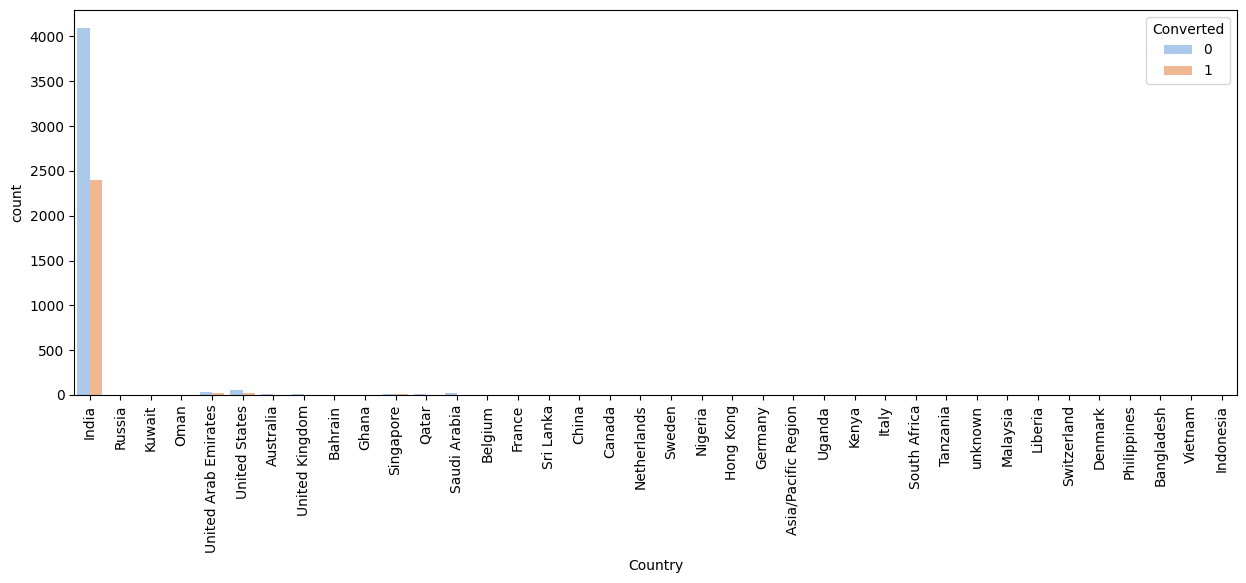

In [12]:
# Plotting spread of Country column
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

## **Note**
- **India** has the highest number of leads.

In [13]:
# Creating a list of columns to be droppped
cols_to_drop=['Country']

In [14]:
# Checking value counts of "City" column
eleads['City'].value_counts(dropna=False)

,count
City,
NaN,3669
Mumbai,3222
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


## **Note**
- **Mumbai** has the highest number of leads.

In [15]:
eleads['City'] = eleads['City'].replace(np.nan,'Mumbai')

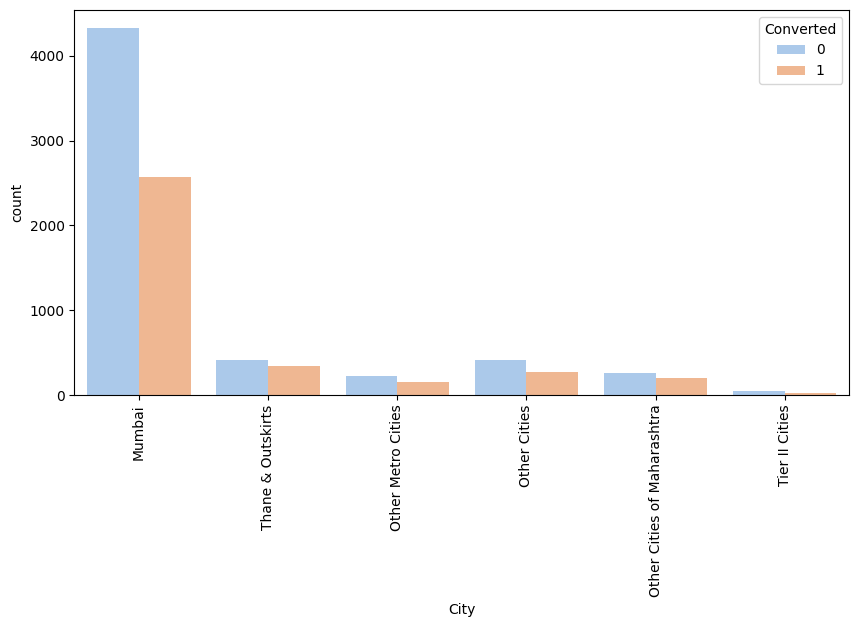

In [16]:
# Plotting spread of City column after replacing NaN values
plt.figure(figsize=(10, 5))
s1 = sns.countplot(x='City', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [17]:
# Checking value counts of Specialization column
eleads['Specialization'].value_counts(dropna=False)

,count
Specialization,
NaN,3380
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


In [18]:
eleads['Specialization'] = eleads['Specialization'].replace(np.nan, 'Not Specified')

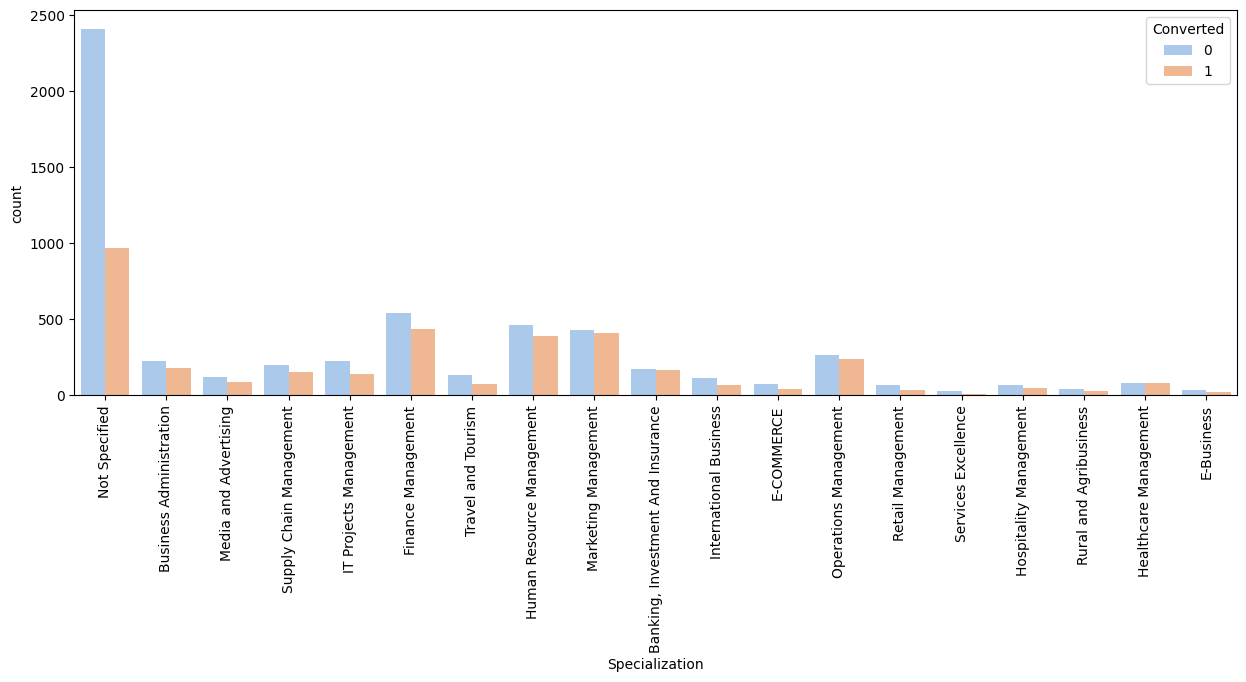

In [19]:
# Plotting spread of Specialization column
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [20]:
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,How did you hear about X Education,7250,78.46
1,Lead Profile,6855,74.19
2,Tags,3353,36.29
3,What matters most to you in choosing a course,2709,29.32
4,What is your current occupation,2690,29.11
5,Country,2461,26.63
6,TotalVisits,137,1.48
7,Page Views Per Visit,137,1.48
8,Last Activity,103,1.11
9,Lead Source,36,0.39


In [21]:
# Combining Management Specializations because they show similar trends
management_specializations = ['Finance Management', 'Human Resource Management', 'Marketing Management',
                              'Operations Management', 'IT Projects Management', 'Supply Chain Management',
                              'Healthcare Management', 'Hospitality Management', 'Retail Management']

eleads['Specialization'] = eleads['Specialization'].replace(management_specializations, 'Management_Specializations')

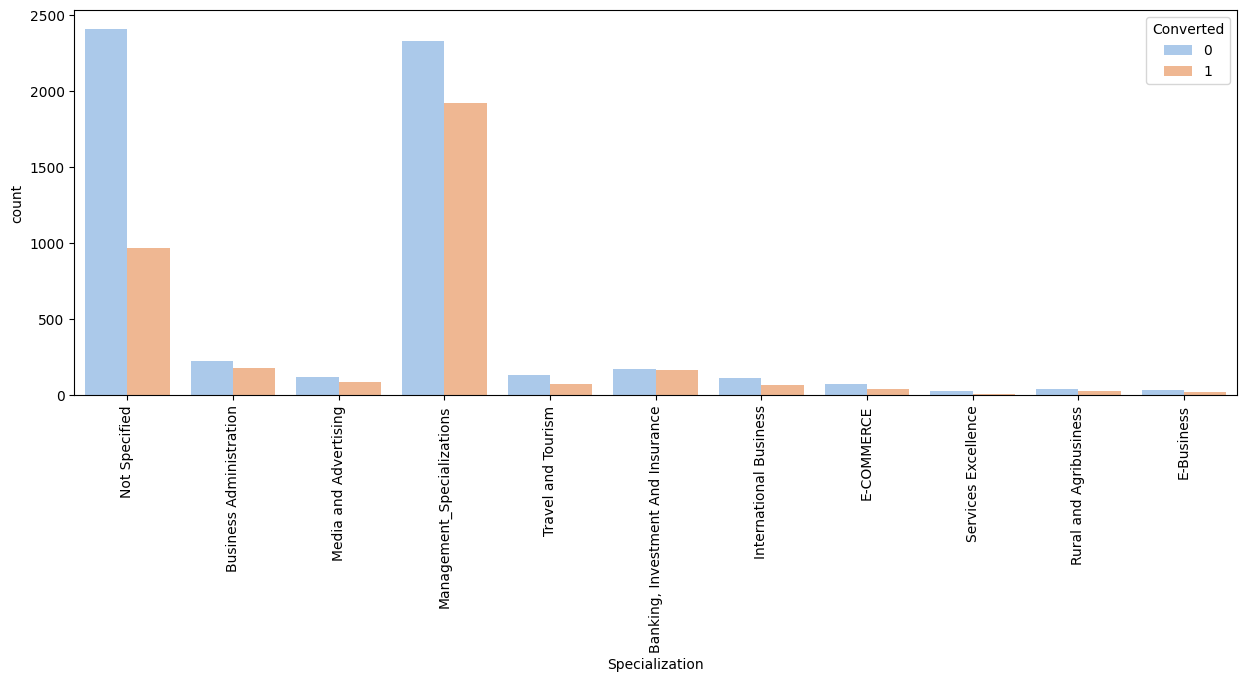

In [22]:
# Visualizing count of Specialization based on Converted value
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [23]:
# Checking value counts of What is your current occupation
eleads['What is your current occupation'].value_counts(dropna=False)

,count
What is your current occupation,
Unemployed,5600
NaN,2690
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


In [24]:
# Imputing Nan values with mode "Unemployed"
eleads['What is your current occupation'] = eleads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [25]:
# Checking count of values
eleads['What is your current occupation'].value_counts(dropna=False)

,count
What is your current occupation,
Unemployed,8290
Working Professional,706
Student,210
Other,16
Housewife,10
Businessman,8


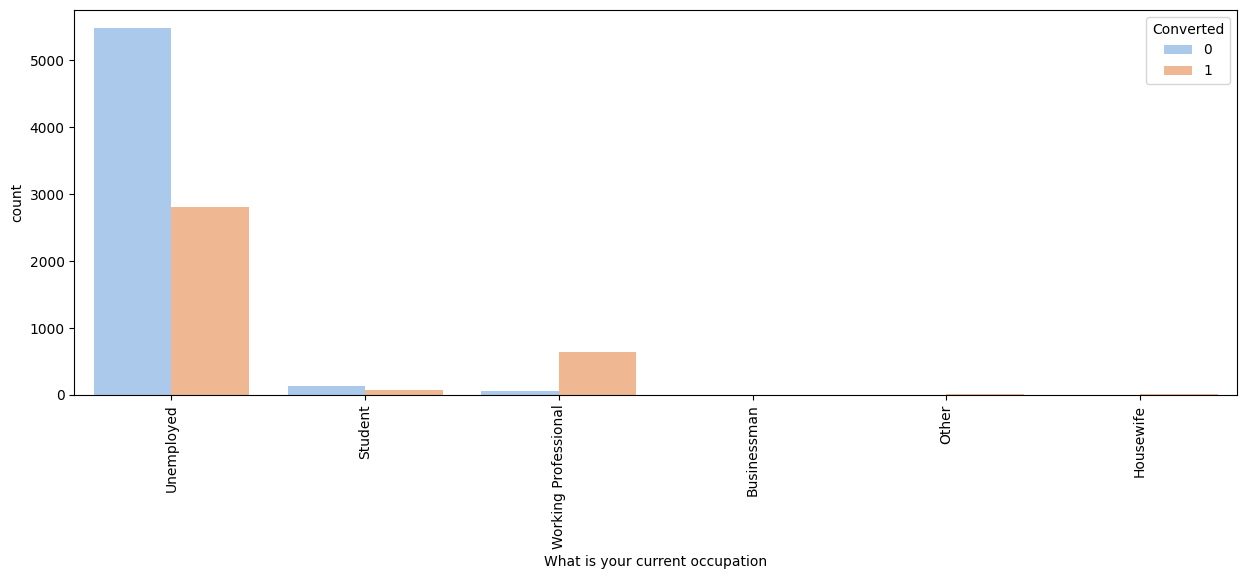

In [26]:
# Visualizing count of 'What is your current occupation' based on Converted value
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [27]:
# Checking value counts of What matters most to you in choosing a course
eleads['What matters most to you in choosing a course'].value_counts(dropna=False)

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
NaN,2709
Flexibility & Convenience,2
Other,1


In [28]:
# Replacing Nan values with Mode "Better Career Prospects"
eleads['What matters most to you in choosing a course'] = eleads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

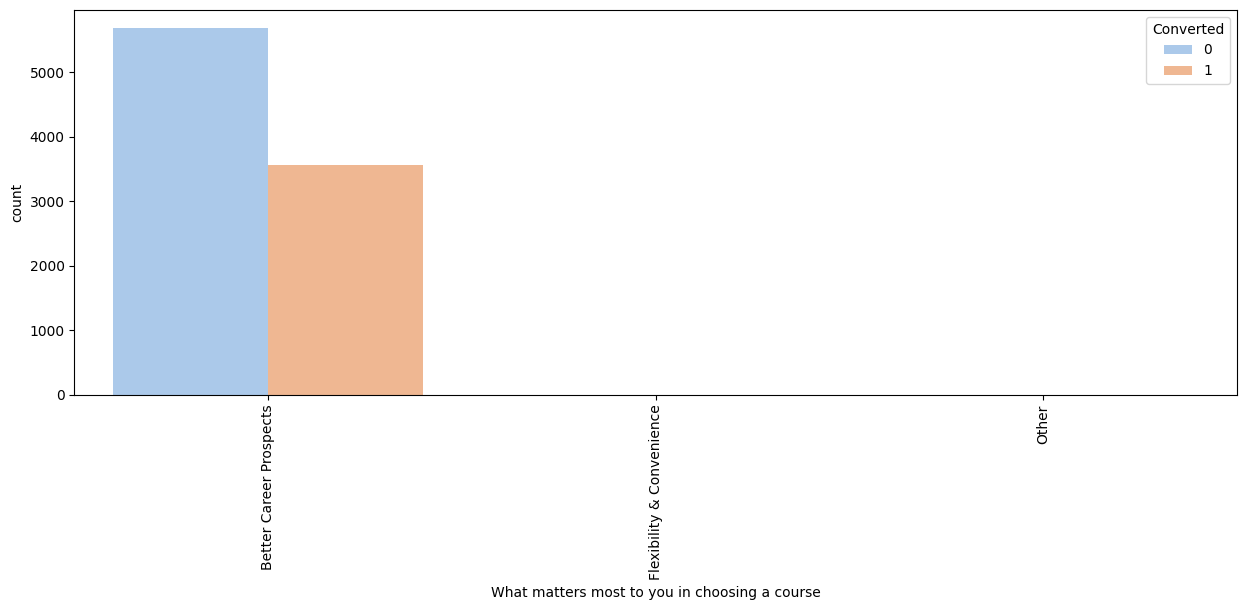

In [29]:
# Visualizing count of 'What matters most to you in choosing a course' based on Converted value
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [30]:
# Checking value counts of What matters most to you in choosing a course
eleads['What matters most to you in choosing a course'].value_counts(dropna=False)

,count
What matters most to you in choosing a course,
Better Career Prospects,9237
Flexibility & Convenience,2
Other,1


In [31]:
# Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [32]:
# Checking value counts of Tag
eleads['Tags'].value_counts(dropna=False)

,count
Tags,
NaN,3353
Will revert after reading the email,2072
Ringing,1203
Interested in other courses,513
Already a student,465
Closed by Horizzon,358
switched off,240
Busy,186
Lost to EINS,175


In [33]:
# Replacing Nan values with "Not Specified"
eleads['Tags'] = eleads['Tags'].replace(np.nan,'Not Specified')

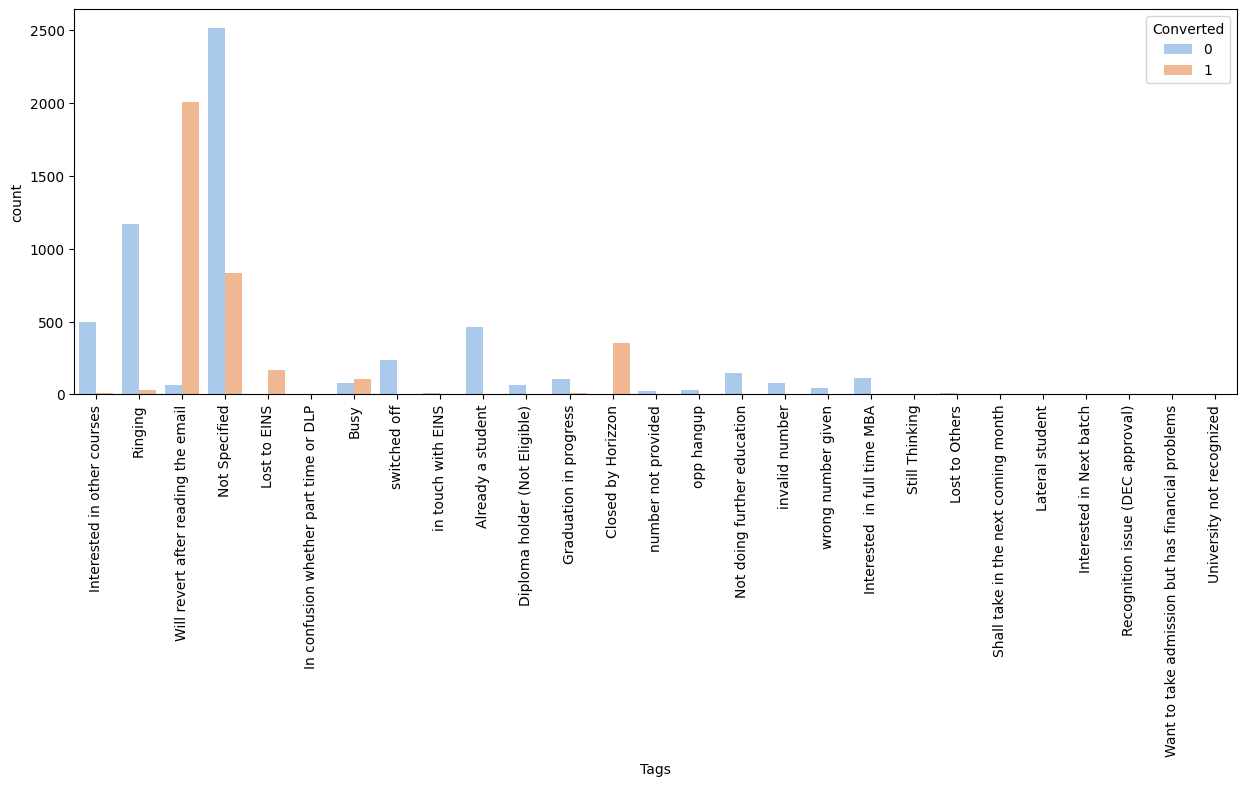

In [34]:
# Visualizing count of 'Tags' based on Converted value
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Tags', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [35]:
# Replacing tags with low frequency with "Other Tags"
eleads['Tags'] = eleads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

eleads['Tags'] = eleads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')


In [36]:
# Checking percentage of missing values
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,How did you hear about X Education,7250,78.46
1,Lead Profile,6855,74.19
2,Country,2461,26.63
3,TotalVisits,137,1.48
4,Page Views Per Visit,137,1.48
5,Last Activity,103,1.11
6,Lead Source,36,0.39
7,Through Recommendations,0,0.00
8,Receive More Updates About Our Courses,0,0.00
9,Tags,0,0.00


In [37]:
# Checking value counts of Lead Source column
eleads['Lead Source'].value_counts(dropna=False)

,count
Lead Source,
Google,2868
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
NaN,36


In [38]:
# Replacing Nan Values and combining low frequency values
eleads['Lead Source'] = eleads['Lead Source'].replace(np.nan,'Others')
eleads['Lead Source'] = eleads['Lead Source'].replace('google','Google')
eleads['Lead Source'] = eleads['Lead Source'].replace('Facebook','Social Media')
eleads['Lead Source'] = eleads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

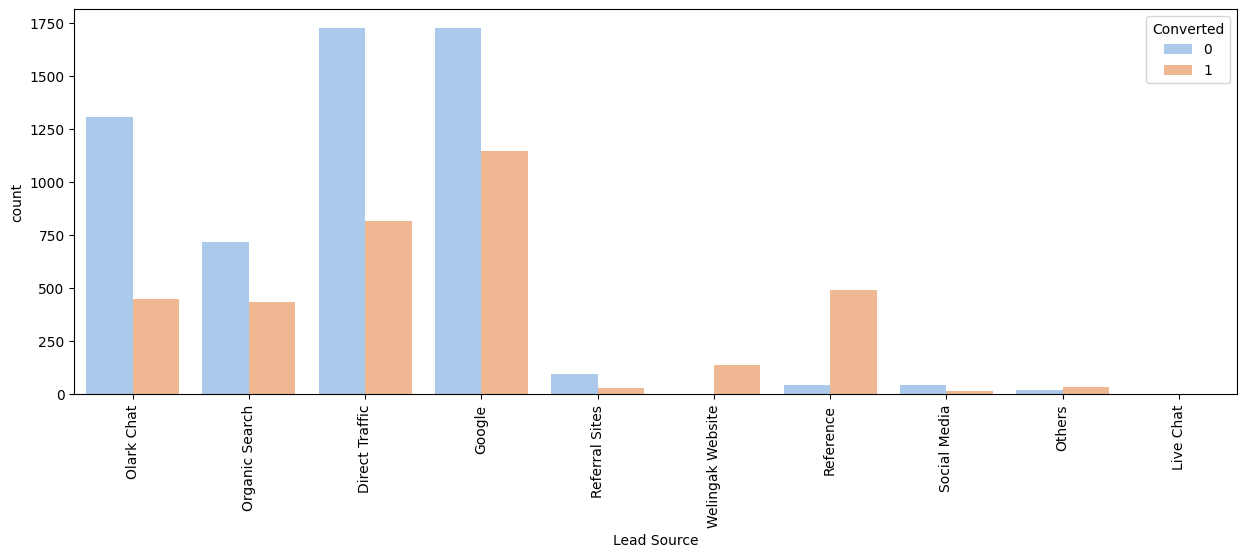

In [39]:
# Visualizing count of 'Lead Source' based on Converted value
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [40]:
#  Checking value counts of Last Activity
eleads['Last Activity'].value_counts(dropna=False)

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
NaN,103


In [41]:
# Replacing Nan Values and combining low frequency values
eleads['Last Activity'] = eleads['Last Activity'].replace(np.nan,'Others')
eleads['Last Activity'] = eleads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [42]:
#  Checking value counts of Last Activity
eleads['Last Activity'].value_counts(dropna=False)

,count
Last Activity,
Email Opened,3437
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Others,308
Email Link Clicked,267
Form Submitted on Website,116


In [43]:
# Check the Null Values in All Columns
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,How did you hear about X Education,7250,78.46
1,Lead Profile,6855,74.19
2,Country,2461,26.63
3,TotalVisits,137,1.48
4,Page Views Per Visit,137,1.48
5,Lead Origin,0,0.00
6,Digital Advertisement,0,0.00
7,Through Recommendations,0,0.00
8,Receive More Updates About Our Courses,0,0.00
9,Tags,0,0.00


In [44]:
# Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
eleads = eleads.dropna()

In [45]:
# Checking percentage of Null Values in All Columns
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,Lead Origin,0,0.0
1,Lead Source,0,0.0
2,A free copy of Mastering The Interview,0,0.0
3,I agree to pay the amount through cheque,0,0.0
4,City,0,0.0
5,Lead Profile,0,0.0
6,Get updates on DM Content,0,0.0
7,Update me on Supply Chain Content,0,0.0
8,Tags,0,0.0
9,Receive More Updates About Our Courses,0,0.0


In [46]:
# Checking value counts of Lead Origin
eleads['Lead Origin'].value_counts(dropna=False)

,count
Lead Origin,
Landing Page Submission,479
API,39
Lead Add Form,2


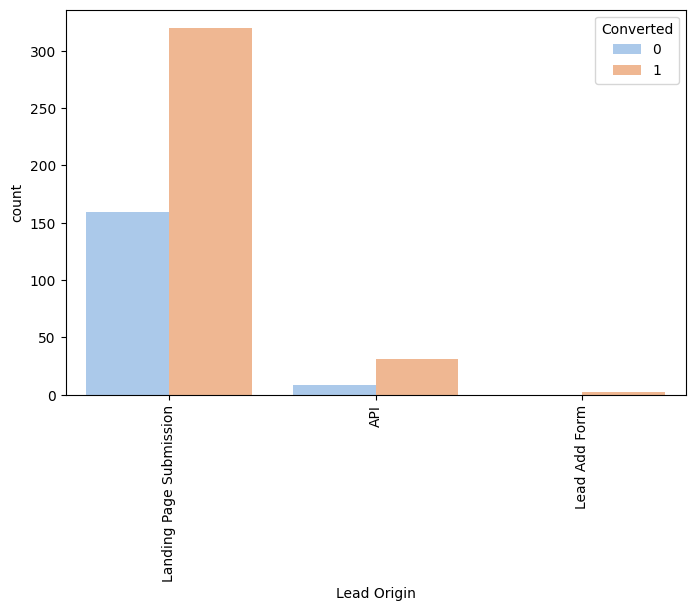

In [47]:
# Visualizing count of 'Lead Origin' based on Converted value
plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Lead Origin', hue='Converted', data=eleads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

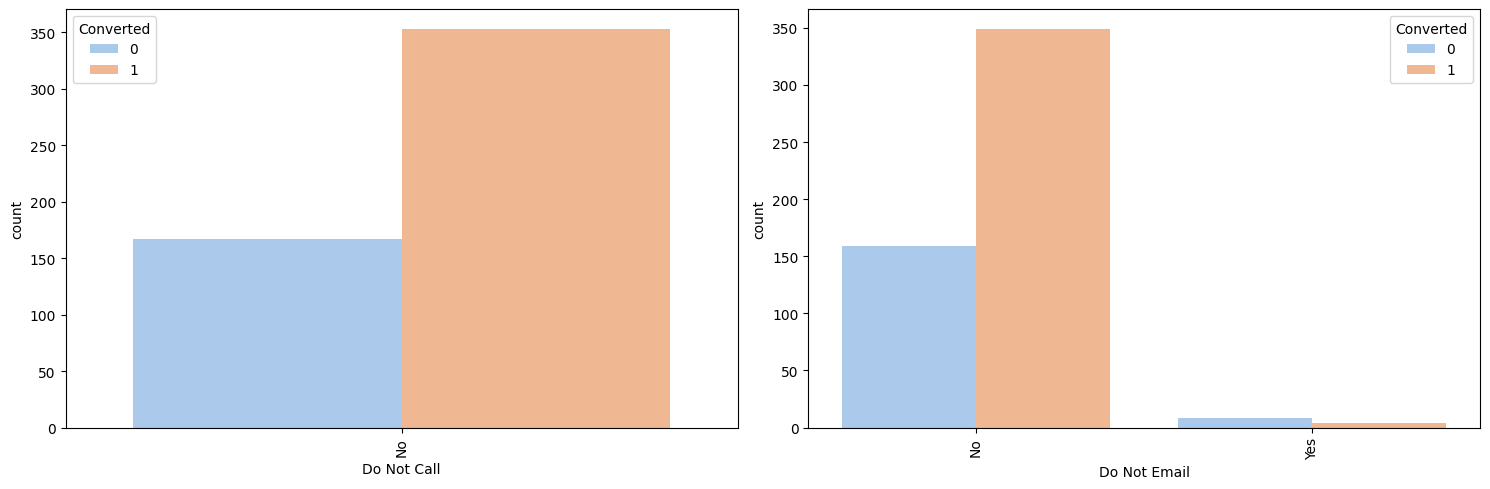

In [48]:
# Visualizing count of 'Do Not Call' and 'Do Not Email' based on Converted value
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=eleads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Email', hue='Converted', data=eleads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [49]:
# Checking value counts for Do Not Call
eleads['Do Not Call'].value_counts(dropna=False)

,count
Do Not Call,
No,520


In [50]:
# Checking value counts for Do Not Email
eleads['Do Not Email'].value_counts(dropna=False)

,count
Do Not Email,
No,508
Yes,12


In [51]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [52]:
eleads.Search.value_counts(dropna=False)

,count
Search,
No,520


In [53]:
eleads.Magazine.value_counts(dropna=False)

,count
Magazine,
No,520


In [54]:
eleads['Newspaper Article'].value_counts(dropna=False)

,count
Newspaper Article,
No,520


In [55]:
eleads['X Education Forums'].value_counts(dropna=False)

,count
X Education Forums,
No,520


In [56]:
eleads['Newspaper'].value_counts(dropna=False)

,count
Newspaper,
No,520


In [57]:
eleads['Digital Advertisement'].value_counts(dropna=False)

,count
Digital Advertisement,
No,520


In [58]:
eleads['Through Recommendations'].value_counts(dropna=False)

,count
Through Recommendations,
No,520


In [59]:
eleads['Receive More Updates About Our Courses'].value_counts(dropna=False)

,count
Receive More Updates About Our Courses,
No,520


In [60]:
eleads['Update me on Supply Chain Content'].value_counts(dropna=False)

,count
Update me on Supply Chain Content,
No,520


In [61]:
eleads['Get updates on DM Content'].value_counts(dropna=False)

,count
Get updates on DM Content,
No,520


In [62]:
eleads['I agree to pay the amount through cheque'].value_counts(dropna=False)

,count
I agree to pay the amount through cheque,
No,520


In [63]:
eleads['A free copy of Mastering The Interview'].value_counts(dropna=False)

,count
A free copy of Mastering The Interview,
No,480
Yes,40


In [64]:
# Adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [65]:
# Checking value counts of last Notable Activity
eleads['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Email Opened,228
Modified,149
SMS Sent,103
Page Visited on Website,20
Email Link Clicked,6
Unsubscribed,5
Had a Phone Conversation,4
Unreachable,3
Olark Chat Conversation,2


In [66]:
# Clubbing lower frequency values
eleads['Last Notable Activity'] = eleads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

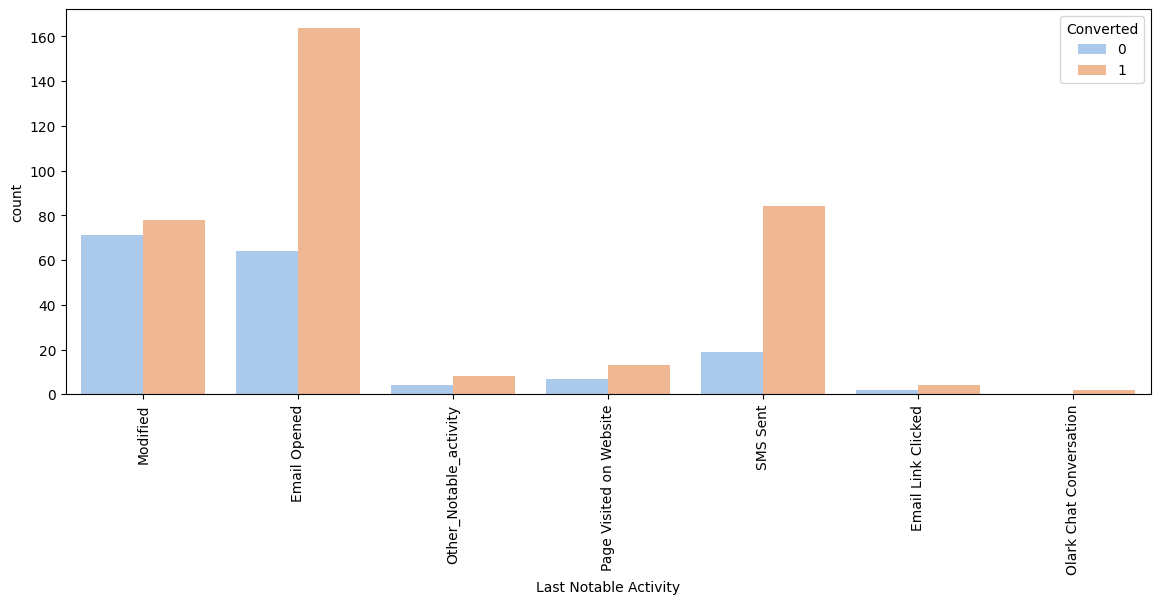

In [67]:
plt.figure(figsize=(14, 5))
ax1 = sns.countplot(x="Last Notable Activity", hue="Converted", data=eleads)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

In [68]:
# Checking value counts for variable
eleads['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Email Opened,228
Modified,149
SMS Sent,103
Page Visited on Website,20
Other_Notable_activity,12
Email Link Clicked,6
Olark Chat Conversation,2


In [69]:
# List of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [70]:
# Dropping columns
eleads = eleads.drop(cols_to_drop, axis=1)
eleads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 6 to 9231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             520 non-null    object 
 1   Lead Source                             520 non-null    object 
 2   Do Not Email                            520 non-null    object 
 3   Converted                               520 non-null    int64  
 4   TotalVisits                             520 non-null    float64
 5   Total Time Spent on Website             520 non-null    int64  
 6   Page Views Per Visit                    520 non-null    float64
 7   Last Activity                           520 non-null    object 
 8   Specialization                          520 non-null    object 
 9   How did you hear about X Education      520 non-null    object 
 10  What is your current occupation         520 non-null    object 
 1

In [71]:
# Check the % of Data that has Converted Values = 1:
Converted = (sum(eleads['Converted'])/len(eleads['Converted'].index))*100
Converted

67.88461538461539

<Figure size 1500x3000 with 0 Axes>

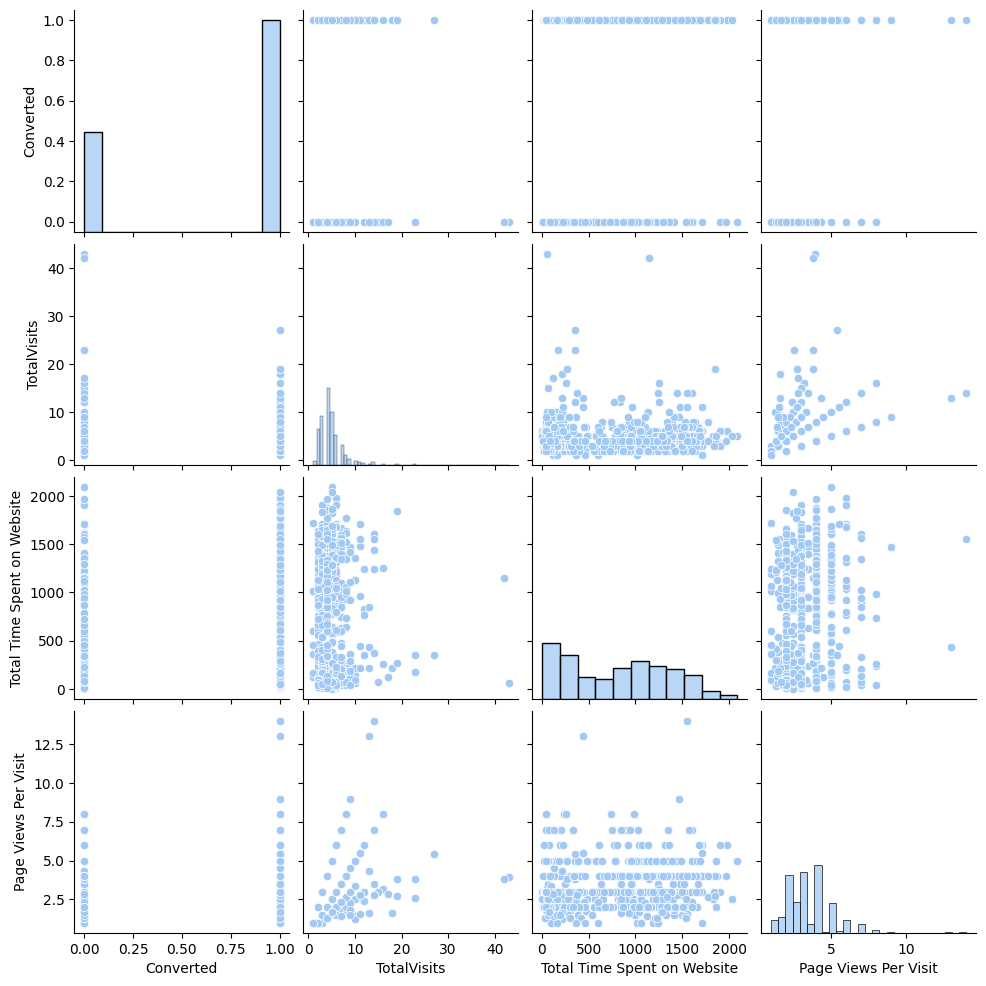

In [72]:
plt.figure(figsize = (15,30))
sns.pairplot(data=eleads)
plt.show()

In [73]:
# Generating list of numerical columns
numeric_cols = eleads.select_dtypes(include=['number'])
numeric_cols.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

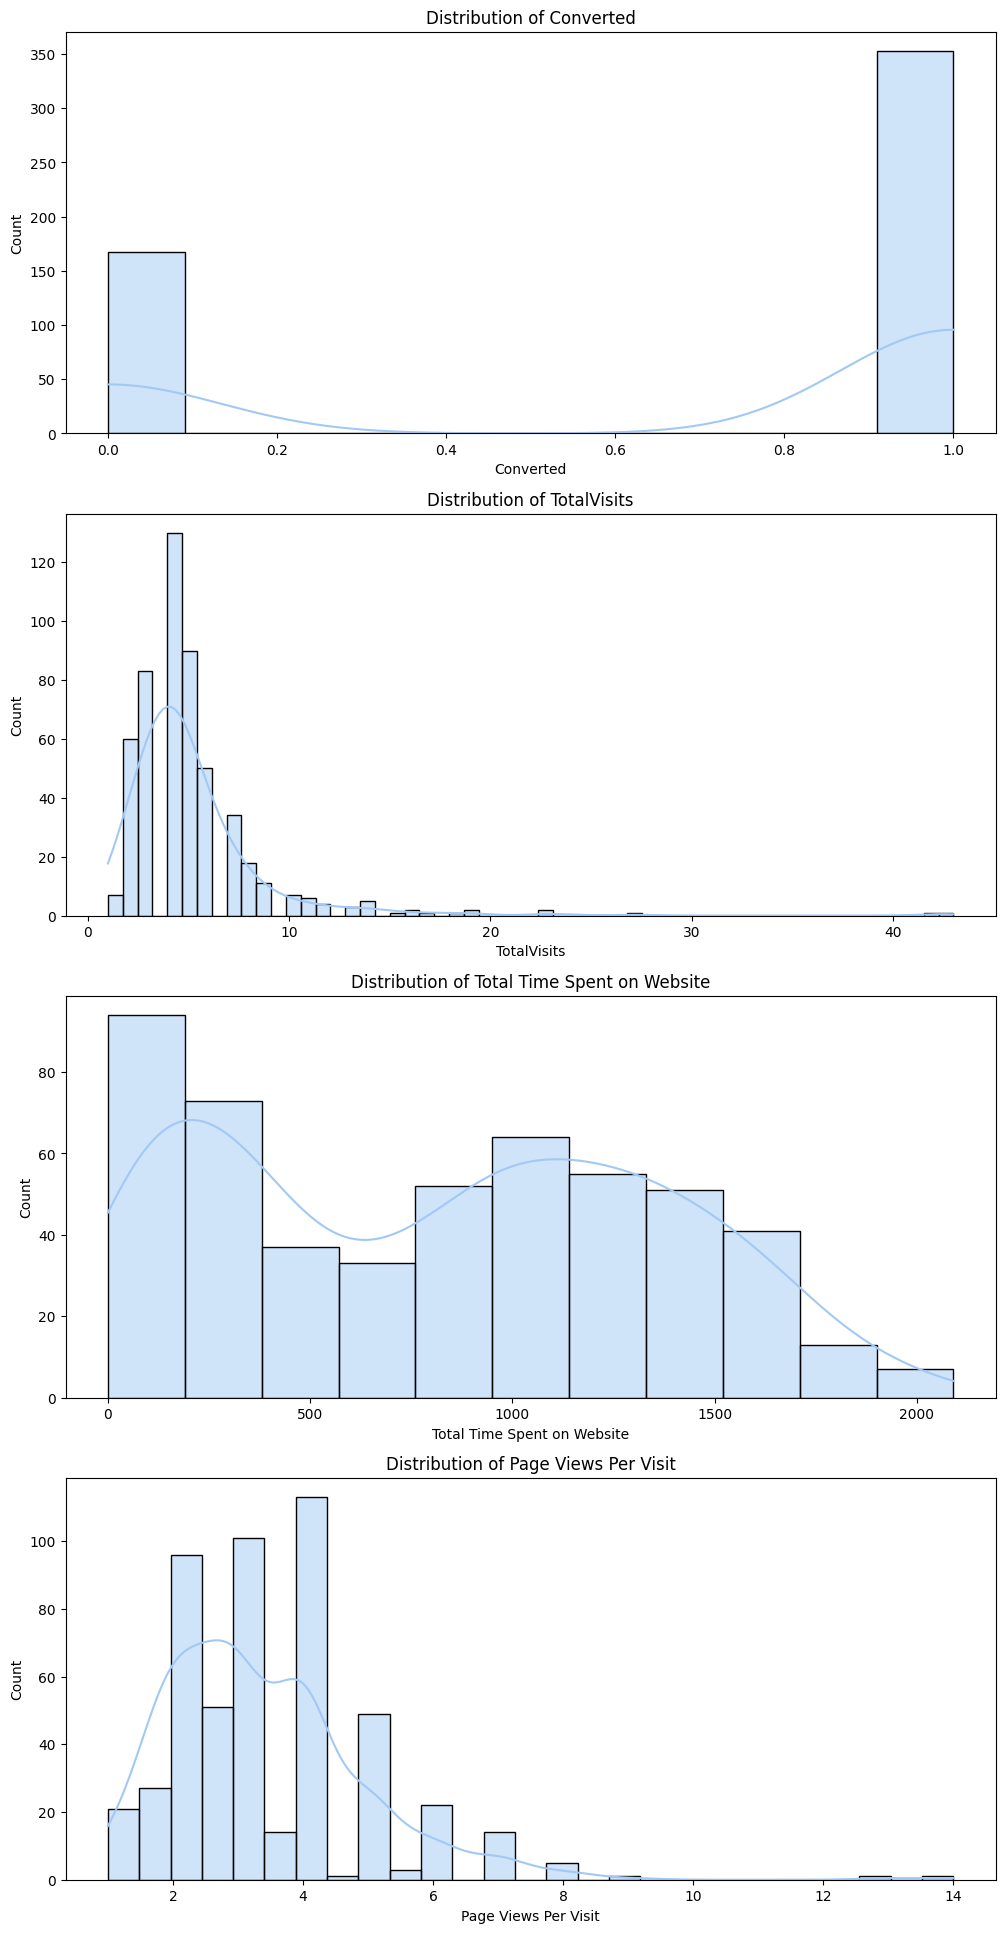

In [74]:
fig, axes = plt.subplots(4,1, figsize=(12, 24))
for ax, (column) in zip(axes, numeric_cols):
    sns.histplot(data=numeric_cols, x=column, ax=ax, kde=True)
    ax.set_title(f'Distribution of {column}', fontsize=12)

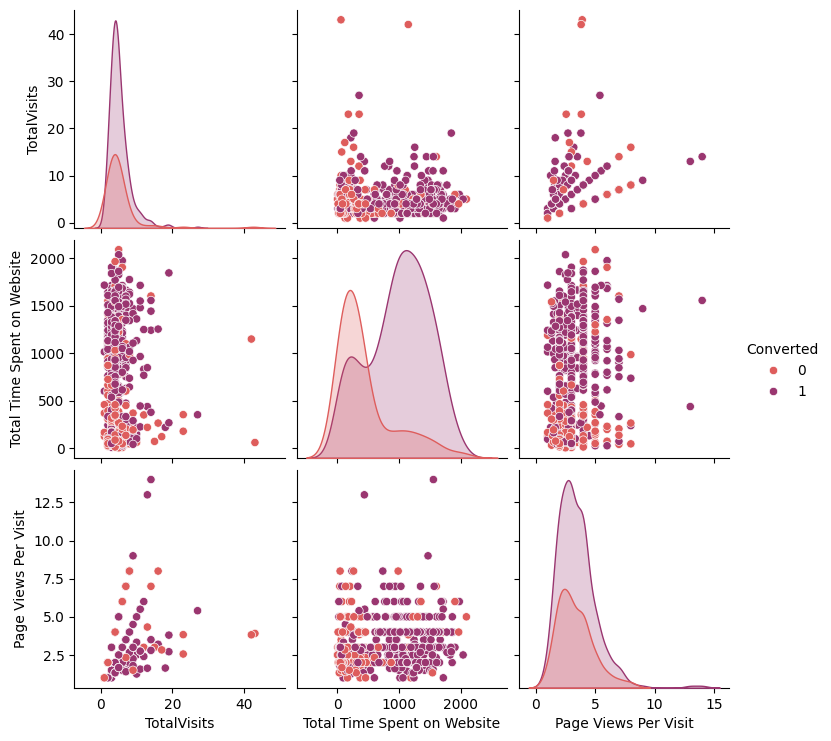

In [75]:
# create a pair plot to visualize the relationship between continuous independent numeric variables and the dependent variable cnt.
sns.pairplot(data = eleads, hue = 'Converted', palette = 'flare')
plt.show()

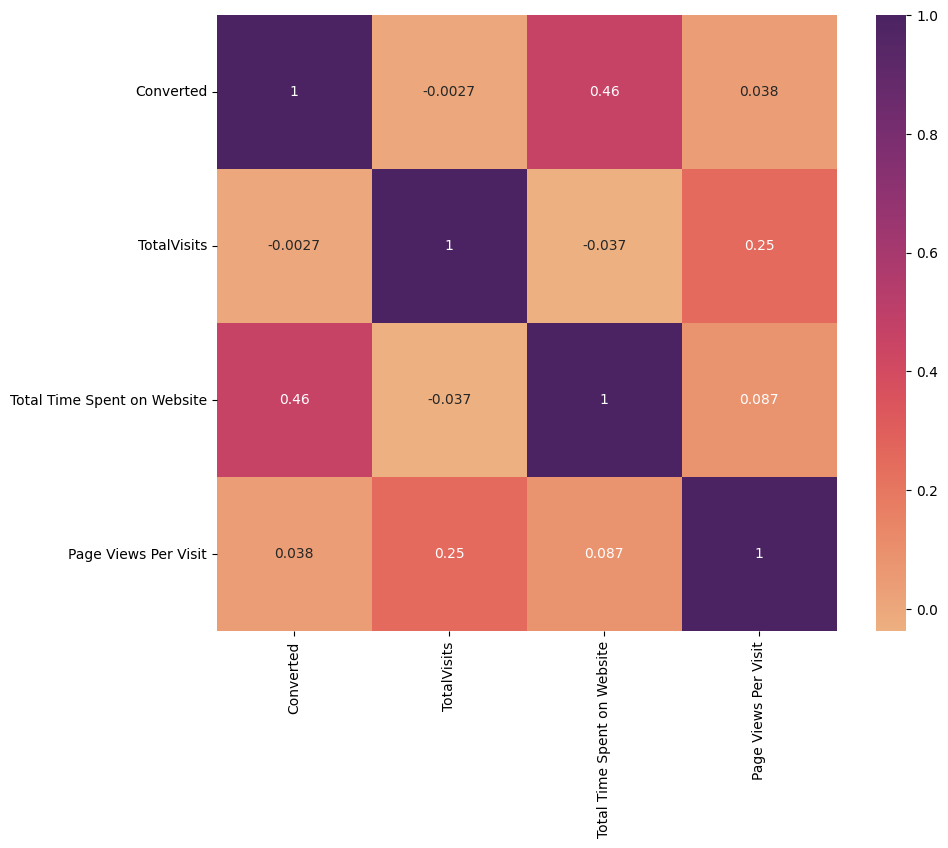

In [76]:
# Checking correlations of numeric values
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(numeric_cols.corr(), cmap = 'flare', annot=True)
plt.show()

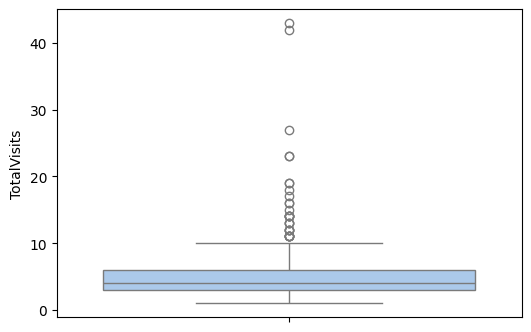

In [77]:
# Total Visits
# Visualizing spread of variable
plt.figure(figsize=(6,4))
sns.boxplot(y=eleads['TotalVisits'])
plt.show()

In [78]:
# Checking percentile values for "Total Visits"
eleads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits
count,520.000000
mean,5.188462
std,3.875602
min,1.000000
5%,2.000000
25%,3.000000
50%,4.000000
75%,6.000000
90%,8.000000
95%,11.000000


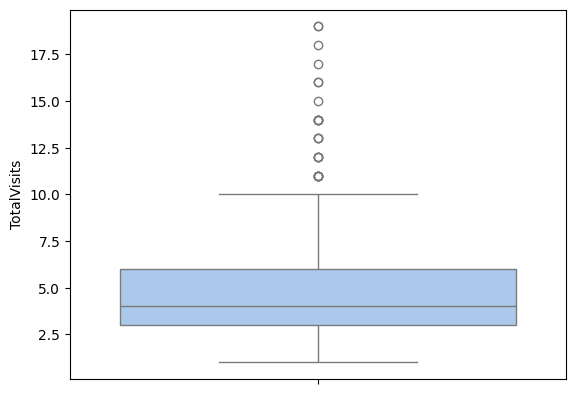

In [79]:
# Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = eleads.TotalVisits.quantile(0.99)
eleads = eleads[(eleads.TotalVisits <= Q3)]
Q1 = eleads.TotalVisits.quantile(0.01)
eleads = eleads[(eleads.TotalVisits >= Q1)]
sns.boxplot(y=eleads['TotalVisits'])
plt.show()

In [80]:
eleads.shape

(515, 16)

In [81]:
# Checking percentiles for "Total Time Spent on Website"
eleads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website
count,515.000000
mean,817.598058
std,550.684759
min,0.000000
5%,43.000000
25%,298.500000
50%,870.000000
75%,1273.000000
90%,1552.600000
95%,1681.600000


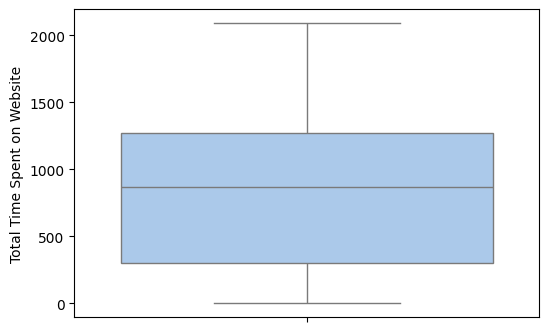

In [82]:
# Visualizing spread of numeric variable
plt.figure(figsize=(6,4))
sns.boxplot(y=eleads['Total Time Spent on Website'])
plt.show()

In [83]:
# Checking spread of "Page Views Per Visit"
eleads['Page Views Per Visit'].describe()

,Page Views Per Visit
count,515.000000
mean,3.401515
std,1.573985
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,14.000000


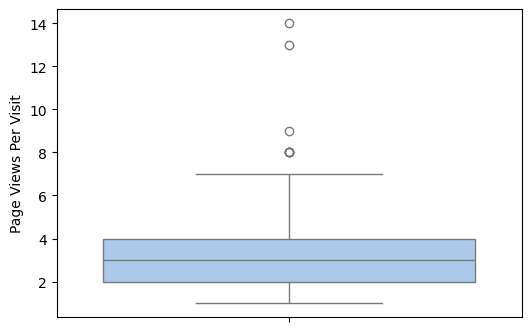

In [84]:
# Visualizing spread of numeric variable
plt.figure(figsize=(6,4))
sns.boxplot(y=eleads['Page Views Per Visit'])
plt.show()

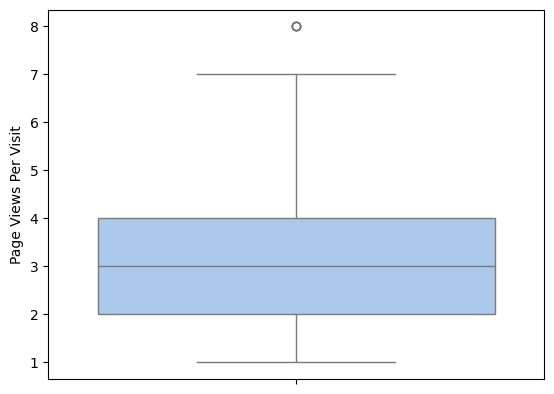

In [85]:
# Outlier Treatment: Remove top & bottom 1%
Q3 = eleads['Page Views Per Visit'].quantile(0.99)
eleads = eleads[eleads['Page Views Per Visit'] <= Q3]
Q1 = eleads['Page Views Per Visit'].quantile(0.01)
eleads = eleads[eleads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=eleads['Page Views Per Visit'])
plt.show()

In [86]:
eleads.shape

(512, 16)

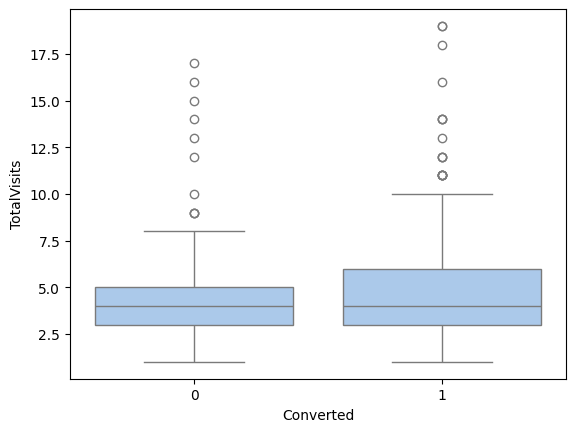

In [87]:
# Checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = eleads)
plt.show()

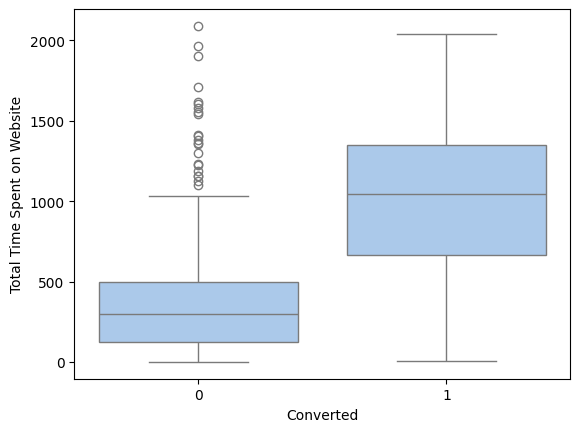

In [88]:
# Checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=eleads.Converted, y=eleads['Total Time Spent on Website'])
plt.show()

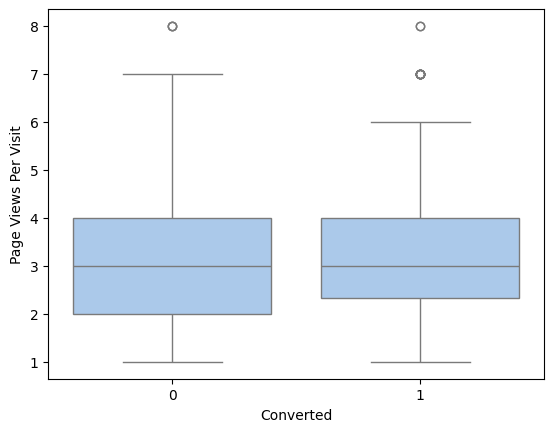

In [89]:
# Checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=eleads.Converted,y=eleads['Page Views Per Visit'])
plt.show()

In [90]:
# Generating a list of categorical columns
categorical_cols = eleads.select_dtypes(include ="object").columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

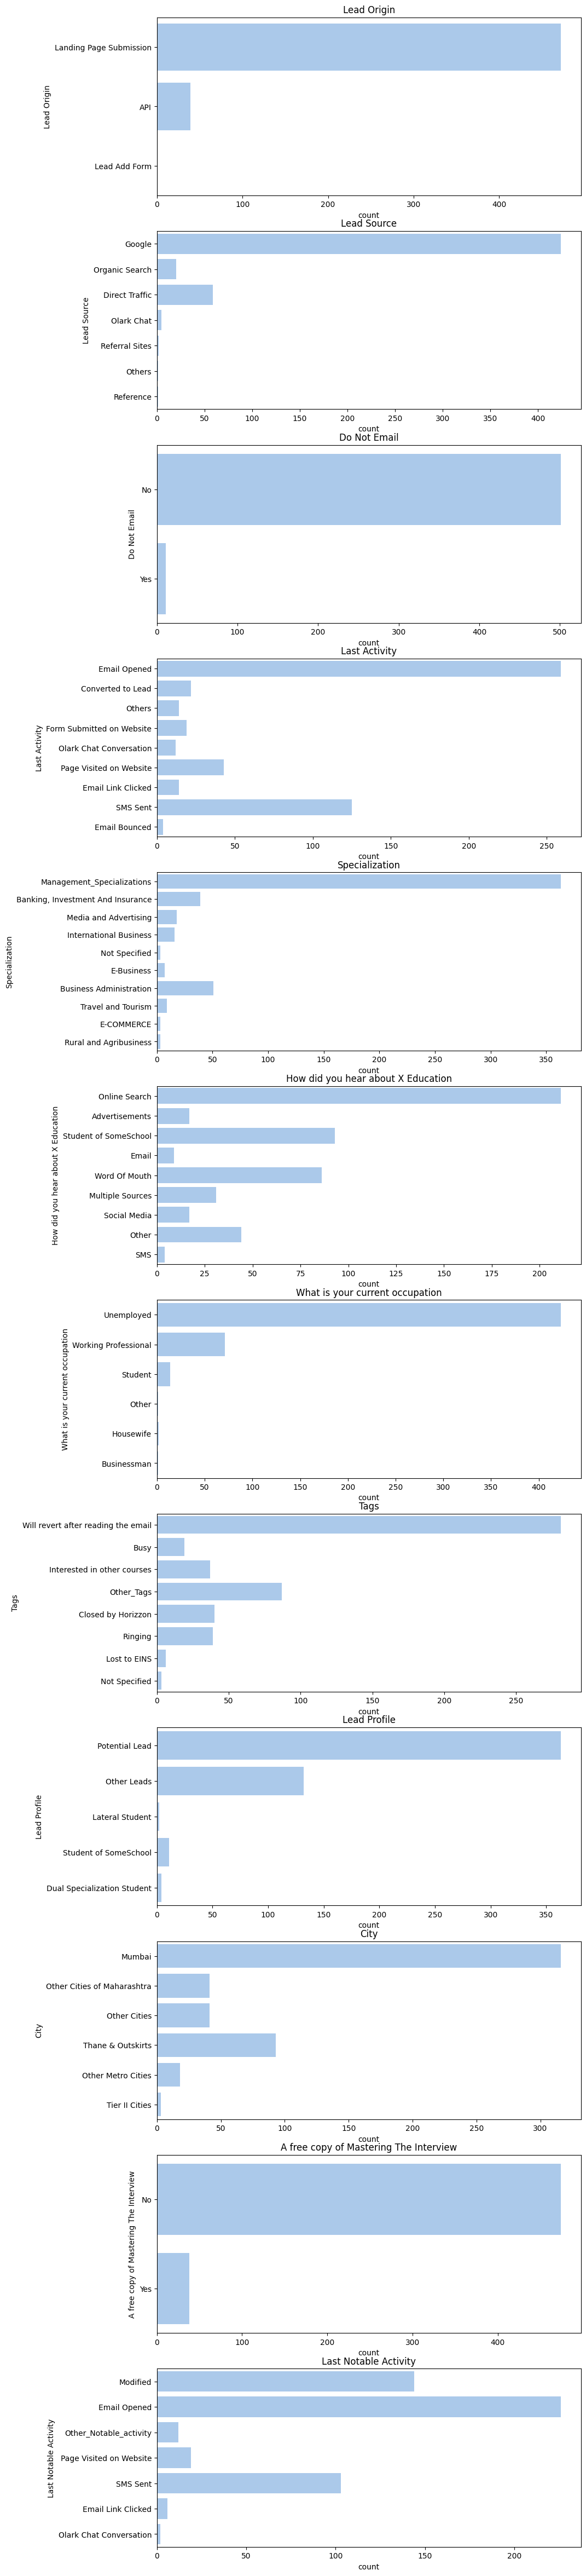

In [91]:
plt.figure(figsize = (10,60))
for idx,(cols) in enumerate(categorical_cols,1):
  plt.subplot(12,1,idx)
  sns.countplot(eleads[cols])
  plt.title(cols)

plt.show()

## **Note**

- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

 ## Dummy Variables


In [92]:
# Checking missing values in leftover columns
evalMissingValuesSum(eleads)

,Column Name,Missing Values,Missing Percentage
0,Lead Origin,0,0.0
1,Lead Source,0,0.0
2,Do Not Email,0,0.0
3,Converted,0,0.0
4,TotalVisits,0,0.0
5,Total Time Spent on Website,0,0.0
6,Page Views Per Visit,0,0.0
7,Last Activity,0,0.0
8,Specialization,0,0.0
9,How did you hear about X Education,0,0.0


In [93]:
# Generating a list of categorical columns
categorical_cols= eleads.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [94]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
eleads[varlist] = eleads[varlist].apply(binary_map)

In [95]:
# Getting dummies and dropping the first column
dummy = pd.get_dummies(eleads[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [96]:
# Getting dummies and dropping the 'Not Specified' column
dummy = pd.get_dummies(eleads['Specialization'], prefix='Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis=1)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [97]:
# Getting dummies and dropping the 'Others' column
dummy = pd.get_dummies(eleads['Lead Source'], prefix='Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [98]:
# Getting dummies and dropping the 'Others' column
dummy = pd.get_dummies(eleads['Last Activity'], prefix='Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [99]:
# Getting dummies and dropping the 'Other_Notable_activity' column
dummy = pd.get_dummies(eleads['Last Notable Activity'], prefix='Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis=1)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [100]:
# Getting dummies and dropping the 'Not Specified' column
dummy = pd.get_dummies(eleads['Tags'], prefix='Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis=1)

# Adding the results to the master dataframe
eleads = pd.concat([eleads, dummy], axis=1)

In [101]:
# Dropping the original columns after dummy variable creation
eleads.drop(categorical_cols, axis=1, inplace=True)

In [102]:
eleads = eleads.astype({col: 'uint8' for col in eleads.select_dtypes(include='bool').columns})

# Display the first few rows of the DataFrame
eleads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6,1,2.0,1640,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22,1,1.0,1013,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
27,1,6.0,1315,6.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
37,1,5.0,563,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39,1,4.0,25,4.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


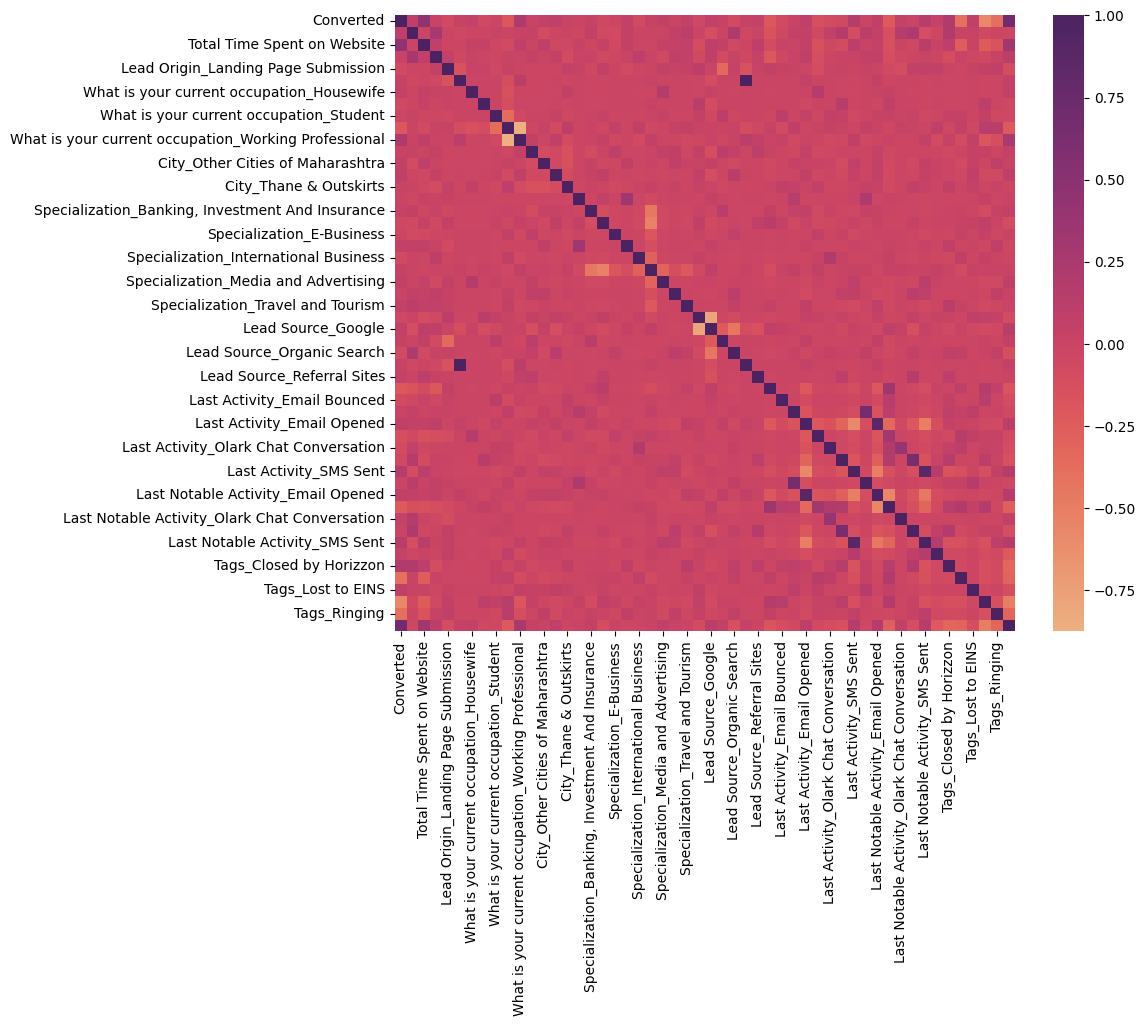

In [103]:
# Checking correlations of numeric values
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(eleads.corr(), cmap = 'flare',annot=False)
plt.show()

## Step 4: Test-Train Split

In [104]:
# Putting response variable to y
y = eleads['Converted']

y.head()

X=eleads.drop('Converted', axis=1)

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 1704 to 135
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           358 non-null    float64
 1   Total Time Spent on Website                           358 non-null    int64  
 2   Page Views Per Visit                                  358 non-null    float64
 3   Lead Origin_Landing Page Submission                   358 non-null    uint8  
 4   Lead Origin_Lead Add Form                             358 non-null    uint8  
 5   What is your current occupation_Housewife             358 non-null    uint8  
 6   What is your current occupation_Other                 358 non-null    uint8  
 7   What is your current occupation_Student               358 non-null    uint8  
 8   What is your current occupation_Unemployed            358 non-

In [107]:
# Scaling numeric columns
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1704,-0.334050,-1.002624,0.481893,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8597,1.209046,0.945585,-0.442669,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4137,0.437498,0.417043,-0.213266,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1813,1.209046,-1.173994,0.481893,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5975,0.051724,0.216810,1.177052,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## **Note**
- Since the dataset contains a large number of variables, dropping columns at this stage is challenging.
- We will perform feature selection using Recursive Feature Elimination (RFE) before deciding which variables to remove.

## Step 5: Model Building

In [108]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize RFE with the Logistic Regression model and 15 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train_scaled, y_train)

# Check the selected features
selected_features = rfe.support_
print("Selected features:", selected_features)

Selected features: [ True  True  True False False False False False False  True False  True
  True False False False False False False False  True False False False
 False False False False False False False False False  True False False
 False False False False  True False False False False  True  True  True
  True  True  True]


In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', False, 23),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Other', False, 12),
 ('What is your current occupation_Student', False, 11),
 ('What is your current occupation_Unemployed', False, 18),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 9),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', True, 1),
 ('City_Thane & Outskirts', False, 8),
 ('City_Tier II Cities', False, 35),
 ('Specialization_Banking, Investment And Insurance', False, 15),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_International Business', False, 37),
 ('Specialization_Management_Specializa

In [110]:
# List of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation_Working Professional',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'Specialization_Management_Specializations',
       'Last Activity_Email Opened', 'Last Notable Activity_Modified',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',

## **Note**
- All the variables selected by Recursive Feature Elimination (RFE) will now be evaluated for statistical significance. The next step involves calculating p-values to determine the significance of each variable and Variance Inflation Factors (VIFs) to check for multicollinearity.

1.   p-values: Help assess the statistical significance of each feature. Variables with high p-values (typically above 0.05) may not contribute significantly to the model and can be considered for removal.
2.   VIF (Variance Inflation Factor): Identifies multicollinearity among the independent variables. A high VIF (usually above 5 or 10) indicates strong correlation with other predictors, which can lead to redundancy and instability in the model.

- These analyses will guide us in refining the final set of features for our model.

# BUILDING MODEL #1

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  358
Model:                            GLM   Df Residuals:                      342
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.178
Date:                Mon, 17 Mar 2025   Deviance:                       68.356
Time:                        13:22:13   Pearson chi2:                     638.
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6443
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6639      0.998      1.668      0.095      -0.291       3.619
TotalVisits                                              0.7272      0.413      1.760      0.078      -0.083       1.537
Total Time Spent on Website                              1.7663      0.465      3.796      0.000       0.854       2.678
Page Views Per Visit                                    -1.1169      0.386     -2.896      0.004      -1.873      -0.361
What is your current occupation_Working Professional    -1.9551      1.112     -1.758      0.079      -4.135       0.225
City_Other Cities of Maharashtra                         4.5652      1.636      2.791      0.005       1.359       7.772
City_Other Metro Cities                                 22.1450   3.48e+04      0.001      0.999   -6.82e+04    6.82e+04
Specialization_Management_Specializations                1.3959      0.852      1.638      0.101      -0.275       3.067
Last Activity_Email Opened                              -2.0344      0.874     -2.327      0.020      -3.748      -0.321
Last Notable Activity_Modified                          -1.4015      0.813     -1.725      0.085      -2.994       0.191
Tags_Closed by Horizzon                                 24.0499      2e+04      0.001      0.999   -3.91e+04    3.91e+04
Tags_Interested in other courses                        -4.5373      1.563     -2.903      0.004      -7.600      -1.474
Tags_Lost to EINS                                       25.7778   4.09e+04      0.001      0.999   -8.01e+04    8.02e+04
Tags_Other_Tags                                         -4.7291      1.217     -3.886      0.000      -7.115      -2.344
Tags_Ringing                                            -7.3657      2.440     -3.019      0.003     -12.147      -2.584
Tags_Will revert after reading the email                 4.4739      1.234      3.625      0.000       2.055       6.893
========================================================================================================================
"""

## **Note**
- Dropping column **Tags_Lost to EINS** as Very high standard error and insignificant p-value

In [113]:
col = col.drop('Tags_Lost to EINS',1)

In [114]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  358
Model:                            GLM   Df Residuals:                      343
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37.673
Date:                Mon, 17 Mar 2025   Deviance:                       75.346
Time:                        13:23:07   Pearson chi2:                     339.
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6373
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0001      1.006      1.987      0.047       0.027       3.973
TotalVisits                                              0.6087      0.386      1.576      0.115      -0.148       1.366
Total Time Spent on Website                              1.5264      0.412      3.704      0.000       0.719       2.334
Page Views Per Visit                                    -0.9181      0.353     -2.602      0.009      -1.610      -0.227
What is your current occupation_Working Professional    -1.3547      1.009     -1.343      0.179      -3.332       0.623
City_Other Cities of Maharashtra                         4.1060      1.510      2.718      0.007       1.146       7.066
City_Other Metro Cities                                 22.8691   3.59e+04      0.001      0.999   -7.04e+04    7.04e+04
Specialization_Management_Specializations                1.3964      0.811      1.722      0.085      -0.193       2.986
Last Activity_Email Opened                              -1.5699      0.789     -1.990      0.047      -3.116      -0.024
Last Notable Activity_Modified                          -0.7195      0.768     -0.937      0.349      -2.225       0.786
Tags_Closed by Horizzon                                 22.7345   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Tags_Interested in other courses                        -5.2519      1.505     -3.490      0.000      -8.201      -2.303
Tags_Other_Tags                                         -5.3904      1.176     -4.584      0.000      -7.695      -3.086
Tags_Ringing                                            -7.5961      2.235     -3.398      0.001     -11.977      -3.215
Tags_Will revert after reading the email                 3.0489      1.001      3.045      0.002       1.086       5.012
========================================================================================================================
"""

## **Note**
- Dropping column **City_Other Metro Cities** as Extremely large standard error, p = 1.000

In [115]:
col = col.drop('City_Other Metro Cities',1)

In [116]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  358
Model:                            GLM   Df Residuals:                      344
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38.948
Date:                Mon, 17 Mar 2025   Deviance:                       77.895
Time:                        13:24:04   Pearson chi2:                     322.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6347
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3765      0.995      2.390      0.017       0.427       4.326
TotalVisits                                              0.6098      0.385      1.584      0.113      -0.145       1.364
Total Time Spent on Website                              1.5625      0.418      3.737      0.000       0.743       2.382
Page Views Per Visit                                    -0.9261      0.356     -2.600      0.009      -1.624      -0.228
What is your current occupation_Working Professional    -0.8021      0.883     -0.908      0.364      -2.533       0.929
City_Other Cities of Maharashtra                         4.1119      1.485      2.769      0.006       1.201       7.022
Specialization_Management_Specializations                1.0491      0.736      1.424      0.154      -0.394       2.493
Last Activity_Email Opened                              -1.4959      0.799     -1.873      0.061      -3.061       0.069
Last Notable Activity_Modified                          -0.8014      0.768     -1.044      0.297      -2.307       0.704
Tags_Closed by Horizzon                                 21.3511   1.28e+04      0.002      0.999   -2.51e+04    2.52e+04
Tags_Interested in other courses                        -5.2775      1.482     -3.560      0.000      -8.183      -2.372
Tags_Other_Tags                                         -5.4442      1.163     -4.682      0.000      -7.723      -3.165
Tags_Ringing                                            -7.6419      2.205     -3.466      0.001     -11.963      -3.321
Tags_Will revert after reading the email                 2.7724      0.894      3.099      0.002       1.019       4.526
========================================================================================================================
"""

## **Note**
- Dropping column **Tags_Closed by Horizzon** as Extremely large standard error and p-value

In [117]:
col = col.drop('Tags_Closed by Horizzon',1)

In [118]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  358
Model:                            GLM   Df Residuals:                      345
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.973
Date:                Mon, 17 Mar 2025   Deviance:                       81.947
Time:                        13:24:16   Pearson chi2:                     341.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6305
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8559      1.013      2.819      0.005       0.871       4.841
TotalVisits                                              0.7813      0.365      2.142      0.032       0.067       1.496
Total Time Spent on Website                              1.5948      0.410      3.891      0.000       0.791       2.398
Page Views Per Visit                                    -1.0088      0.354     -2.849      0.004      -1.703      -0.315
What is your current occupation_Working Professional    -0.6824      0.833     -0.819      0.413      -2.315       0.950
City_Other Cities of Maharashtra                         4.3881      1.554      2.824      0.005       1.342       7.434
Specialization_Management_Specializations                1.1523      0.735      1.567      0.117      -0.289       2.593
Last Activity_Email Opened                              -1.1766      0.756     -1.557      0.119      -2.658       0.304
Last Notable Activity_Modified                          -0.7801      0.757     -1.031      0.303      -2.264       0.704
Tags_Interested in other courses                        -6.1109      1.420     -4.305      0.000      -8.893      -3.329
Tags_Other_Tags                                         -6.2148      1.127     -5.513      0.000      -8.424      -4.005
Tags_Ringing                                            -8.4895      2.244     -3.783      0.000     -12.888      -4.091
Tags_Will revert after reading the email                 2.0482      0.813      2.519      0.012       0.454       3.642
========================================================================================================================
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Specialization_Management_Specializations,2.72
11,Tags_Will revert after reading the email,2.64
6,Last Activity_Email Opened,1.92
9,Tags_Other_Tags,1.62
7,Last Notable Activity_Modified,1.59
8,Tags_Interested in other courses,1.33
3,What is your current occupation_Working Profes...,1.31
10,Tags_Ringing,1.23
1,Total Time Spent on Website,1.20
0,TotalVisits,1.14


## **Note**
- The model appears well-optimized, with low VIF values indicating minimal multicollinearity and most p-values suggesting statistical significance.
- The retained features contribute meaningfully to predicting conversion.

In [120]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
1704,0.855437
8597,0.999745
4137,0.992964
1813,0.969705
5975,0.967586
9211,0.995820
2402,0.998124
5991,0.976316
4489,0.989215
9126,0.998749


In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85543681, 0.99974479, 0.99296355, 0.96970519, 0.96758595,
       0.99581997, 0.99812396, 0.9763158 , 0.98921524, 0.99874854])

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.855437,1704
1,1,0.999745,8597
2,1,0.992964,4137
3,1,0.969705,1813
4,1,0.967586,5975


In [123]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.855437,1704,1
1,1,0.999745,8597,1
2,1,0.992964,4137,1
3,1,0.969705,1813,1
4,1,0.967586,5975,1


In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[100   8]
 [  4 246]]


In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9664804469273743


In [126]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.984

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.9259259259259259

In [129]:
# Calculate False Positive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07407407407407407


In [130]:
# Calculate positive predictive value
print (TP / float(TP+FP))

0.968503937007874


In [131]:
# Calculate negative predictive value
print (TN / float(TN+ FN))

0.9615384615384616


In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

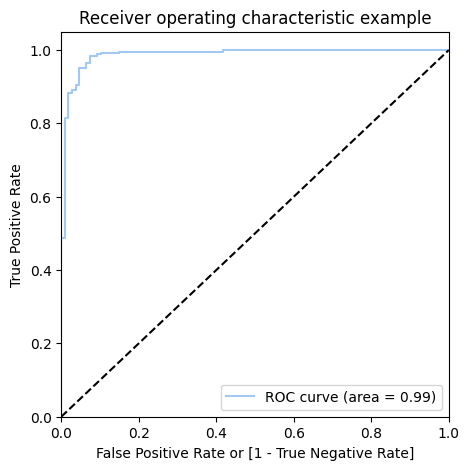

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## **Note**
- The ROC AUC score of 0.99 indicates that the model performs well in distinguishing between converted and non-converted leads.
- To further refine the model, we will analyze the sensitivity-specificity tradeoff to determine the optimal cutoff point for better balance between false positives and false negatives.







In [135]:
# Let's create columns with different probability cutoffs
numbers = [x * 0.1 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.855437,1704,1,1,1,1,1,1,1,1,1,1,0
1,1,0.999745,8597,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992964,4137,1,1,1,1,1,1,1,1,1,1,1
3,1,0.969705,1813,1,1,1,1,1,1,1,1,1,1,1
4,1,0.967586,5975,1,1,1,1,1,1,1,1,1,1,1


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



     prob  accuracy  sensi     speci
0.0   0.0  0.698324  1.000  0.000000
0.1   0.1  0.932961  0.996  0.787037
0.2   0.2  0.963687  0.992  0.898148
0.3   0.3  0.963687  0.992  0.898148
0.4   0.4  0.963687  0.988  0.907407
0.5   0.5  0.966480  0.984  0.925926
0.6   0.6  0.963687  0.980  0.925926
0.7   0.7  0.955307  0.964  0.935185
0.8   0.8  0.949721  0.948  0.953704
0.9   0.9  0.913408  0.892  0.962963


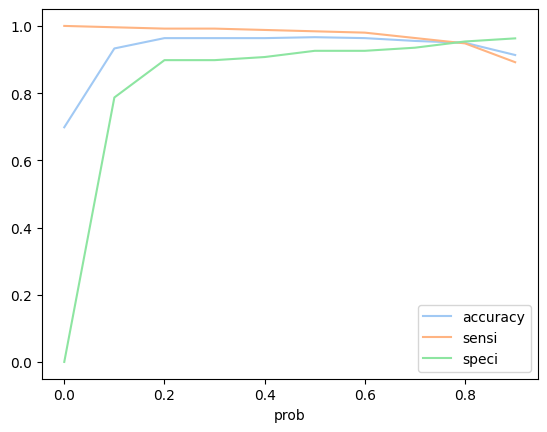

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## **Note**
- From the curve above, 0.8 is the optimum point to take it as a cutoff probability.

In [140]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.855437,1704,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.999745,8597,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992964,4137,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.969705,1813,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.967586,5975,1,1,1,1,1,1,1,1,1,1,1,1


In [141]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.855437,1704,1,86
1,1,0.999745,8597,1,100
2,1,0.992964,4137,1,99
3,1,0.969705,1813,1,97
4,1,0.967586,5975,1,97


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9497206703910615

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[103,   5],
       [ 13, 237]])

In [144]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.948

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9537037037037037

In [147]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.046296296296296294


In [148]:
# Positive predictive value
print (TP / float(TP+FP))

0.9793388429752066


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8879310344827587


In [150]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[103,   5],
       [ 13, 237]])

In [151]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9793388429752066

In [152]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.948

In [153]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9793388429752066

In [154]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.948

In [155]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

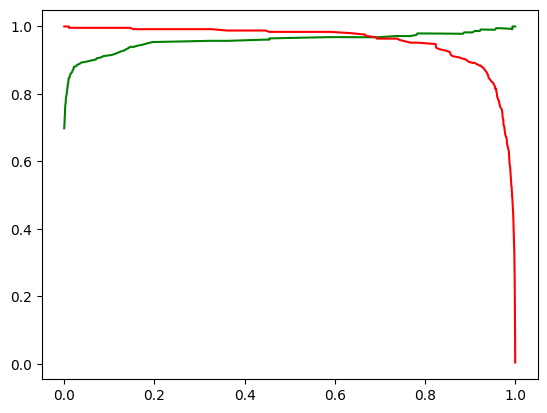

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [157]:
# Scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6711,-0.326858,1.405323,0.395590,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8671,-0.671627,-0.958440,-1.416452,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3401,0.362678,0.340331,-1.416452,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
761,1.741752,-1.394456,-0.090037,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2840,-0.671627,-1.455684,-0.329227,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Working Professional,City_Other Cities of Maharashtra,Specialization_Management_Specializations,Last Activity_Email Opened,Last Notable Activity_Modified,Tags_Interested in other courses,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6711,-0.326858,1.405323,0.395590,0,0,1,1,0,0,0,0,1
8671,-0.671627,-0.958440,-1.416452,0,1,1,1,0,0,0,1,0
3401,0.362678,0.340331,-1.416452,0,0,1,1,0,0,0,0,1
761,1.741752,-1.394456,-0.090037,0,0,1,1,0,1,0,0,0
2840,-0.671627,-1.455684,-0.329227,0,0,1,0,1,0,1,0,0


In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
y_test_pred = res.predict(X_test_sm)

In [161]:
y_test_pred[:10]

,0
6711,0.998448
8671,0.130776
3401,0.999204
761,0.017097
2840,0.004067
9091,0.996882
3733,0.008029
4088,0.992830
9149,0.841846
5173,0.997544


In [162]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
# Let's see the head
y_pred_1.head()

,0
6711,0.998448
8671,0.130776
3401,0.999204
761,0.017097
2840,0.004067


In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6711,0.998448
1,0,8671,0.130776
2,1,3401,0.999204
3,0,761,0.017097
4,0,2840,0.004067


In [169]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [170]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,6711,0.998448
1,0,8671,0.130776
2,1,3401,0.999204
3,0,761,0.017097
4,0,2840,0.004067


In [171]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,6711,1,0.998448,100
1,8671,0,0.130776,13
2,3401,1,0.999204,100
3,761,0,0.017097,2
4,2840,0,0.004067,0


In [173]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [174]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,6711,1,0.998448,100,1
1,8671,0,0.130776,13,0
2,3401,1,0.999204,100,1
3,761,0,0.017097,2,0
4,2840,0,0.004067,0,0


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9285714285714286

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[48,  7],
       [ 4, 95]])

In [177]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9595959595959596

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.8727272727272727

In [180]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9313725490196079

In [181]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9595959595959596